In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# df = pd.read_csv('/kaggle/input/fifa-worldcup98/invocation_count.csv')
df = pd.read_csv('/kaggle/input/fifa-worldcup98/invocation_count.csv')
df.columns = ['ts', 'requests']
df['ts'] = pd.to_datetime(df['ts'])

print(f'DATASET - Dates: {df["ts"].count()} | Total: {df["requests"].sum()}')

DATASET - Dates: 125300 | Total: 1352804107


In [66]:
df.head(100)

,ts,requests
0,1998-04-30 21:30:00,2
1,1998-04-30 21:31:00,11
2,1998-04-30 21:32:00,16
3,1998-04-30 21:33:00,7
4,1998-04-30 21:34:00,3
...,...,...
95,1998-04-30 23:05:00,985
96,1998-04-30 23:06:00,860
97,1998-04-30 23:07:00,822
98,1998-04-30 23:08:00,598


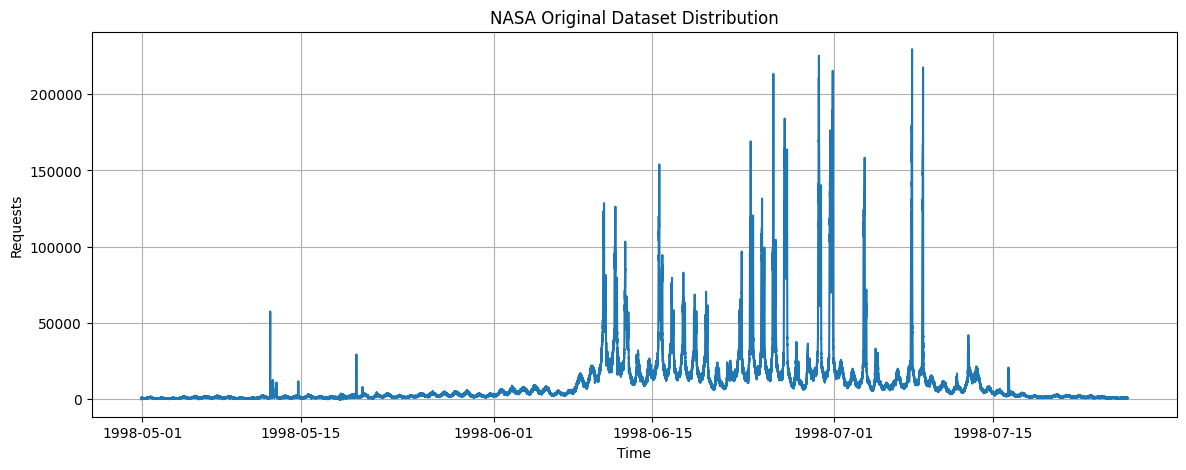

In [67]:
plt.figure(figsize=(14, 5))
plt.plot(df['ts'], df['requests'])
plt.title('NASA Original Dataset Distribution')
plt.xlabel('Time')
plt.ylabel('Requests')
plt.grid(True)
plt.show()

In [68]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the data
scaler = MinMaxScaler()
df['requests_scaled'] = scaler.fit_transform(df[['requests']])
 
# Split into train and test sets
train_size = int(len(df) * 0.7)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Create sequences
def create_sequences(data, sequence_length=10):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data['requests_scaled'].values[i:i + sequence_length])
        y.append(data['requests_scaled'].values[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10
X_train, y_train = create_sequences(train, sequence_length)
X_test, y_test = create_sequences(test, sequence_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(X_test.shape)

(87700, 10, 1)
(37580, 10, 1)


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define Bi-LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(30, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], 1)))
bilstm_model.add(Bidirectional(LSTM(30, activation='relu')))
bilstm_model.add(Dense(1))

bilstm_model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='loss', patience=5)

bilstm_model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

# Evaluate on the test set
bilstm_predictions = bilstm_model.predict(X_test)
bilstm_predicted_values = scaler.inverse_transform(bilstm_predictions)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1371/1371 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 5.9242e-04
Epoch 2/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.8159e-05
Epoch 3/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.2690e-05
Epoch 4/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.7524e-05
Epoch 5/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.6076e-05
Epoch 6/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.3746e-05
Epoch 7/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.2103e-05
Epoch 8/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.8692e-05
Epoch 9/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.8382e-05
Epoch 10/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.5729e-05
Epoch 11/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.7956e-05
Epoch 12/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.7473e-05
Epoch 13/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.5814e-05
Epoch 14/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - 

In [70]:
# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(30, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
lstm_model.add(LSTM(30, activation='relu'))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mse')
print("Training LSTM Model...")
lstm_model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

# Evaluate on the test set
lstm_predictions = lstm_model.predict(X_test)
lstm_predicted_values = scaler.inverse_transform(lstm_predictions)

Training LSTM Model...
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1371/1371 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 7.7428e-04
Epoch 2/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.3097e-05
Epoch 3/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.4149e-05
Epoch 4/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.0819e-05
Epoch 5/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.6007e-05
Epoch 6/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.5626e-05
Epoch 7/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.3310e-05
Epoch 8/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7542e-05
Epoch 9/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8163e-05
Epoch 10/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6384e-05
Epoch 11/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7626e-05
Epoch 12/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6376e-05
Epoch 13/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5831e-05
Epoch 14/20
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - l

In [71]:
# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(30, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
rnn_model.add(SimpleRNN(30, activation='relu'))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer='adam', loss='mse')
print("Training RNN Model...")
rnn_model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1)

# Evaluate on the test set
rnn_predictions = rnn_model.predict(X_test)
rnn_predicted_values = scaler.inverse_transform(rnn_predictions)

Training RNN Model...
Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1371/1371 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.0624e-04
Epoch 2/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8747e-05
Epoch 3/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7761e-05
Epoch 4/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7209e-05
Epoch 5/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7795e-05
Epoch 6/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6755e-05
Epoch 7/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6859e-05
Epoch 8/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5053e-05
Epoch 9/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6544e-05
Epoch 10/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6715e-05
Epoch 11/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5555e-05
Epoch 12/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5035e-05
Epoch 13/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5903e-05
Epoch 14/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - l

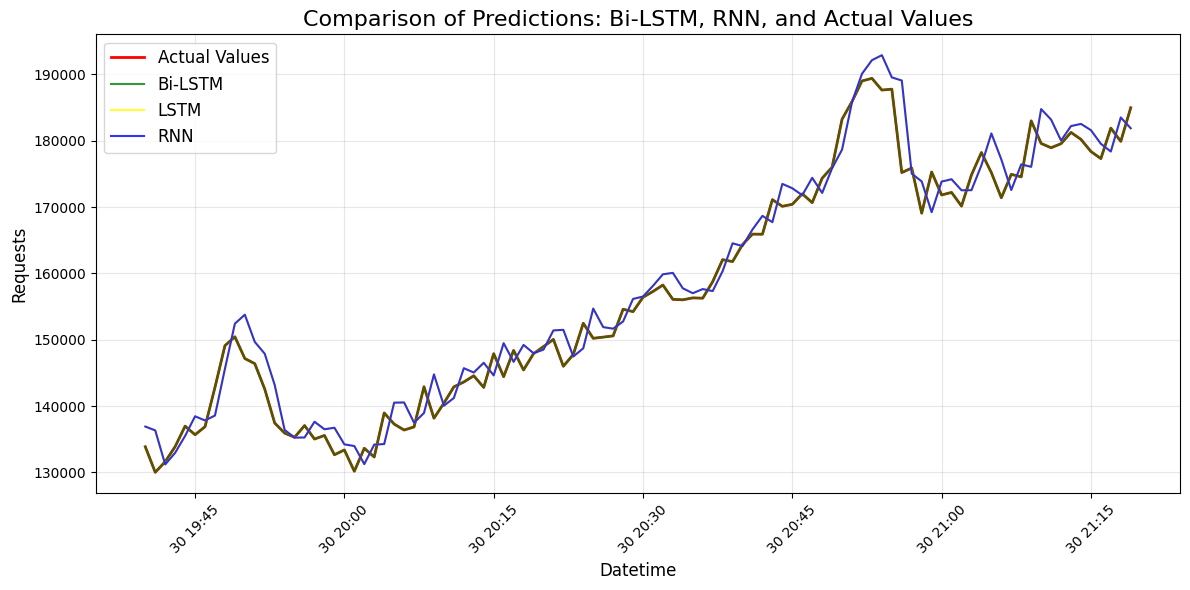

In [76]:
# Extract timestamps for the first 100 minutes (or all if less)
timestamps = test['ts'].iloc[sequence_length:].reset_index(drop=True)[:100]
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

timestamps_100 = timestamps[:100]
bilstm_100 = bilstm_y_test_scaled[:100]
lstm_100 = rnn_predicted_values[:100]
rnn_100 = rnn_predicted_values[:100]
actual_100 = y_test_scaled[:100]


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Actual Values
plt.plot(timestamps_100, actual_100, label="Actual Values", color='red', linestyle='-', linewidth=2)

plt.plot(timestamps_100, bilstm_100, label="Bi-LSTM", color='green', alpha=0.8)
plt.plot(timestamps_100, lstm_100, label="LSTM", color='yellow', alpha=0.8)
plt.plot(timestamps_100, rnn_100, label="RNN", color='blue', alpha=0.8)

# Configure the Plot
plt.title("Comparison of Predictions: Bi-LSTM, RNN, and Actual Values", fontsize=16)
plt.xlabel("Datetime", fontsize=12)
plt.ylabel("Requests", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate evaluation metrics for RNN model
rnn_mse = mean_squared_error(y_test_scaled, rnn_predicted_values)
rnn_rmse = np.sqrt(rnn_mse)
rnn_mae = mean_absolute_error(y_test_scaled, rnn_predicted_values)
rnn_r2 = r2_score(y_test_scaled, rnn_predicted_values)

# Calculate evaluation metrics for LSTM model
lstm_mse = mean_squared_error(y_test_scaled, lstm_predicted_values)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test_scaled, lstm_predicted_values)
lstm_r2 = r2_score(y_test_scaled, lstm_predicted_values)

# Calculate evaluation metrics for Bi-LSTM model
bilstm_mse = mean_squared_error(y_test_scaled, bilstm_predicted_values)
bilstm_rmse = np.sqrt(bilstm_mse)
bilstm_mae = mean_absolute_error(y_test_scaled, bilstm_predicted_values)
bilstm_r2 = r2_score(y_test_scaled, bilstm_predicted_values)

# Print the evaluation metrics for all models
print(f"--- RNN Model ---")
print(f"Mean Squared Error (MSE): {rnn_mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {rnn_rmse:.5f}")
print(f"Mean Absolute Error (MAE): {rnn_mae:.5f}")
print(f"R-squared (R²): {rnn_r2:.5f}")
print("\n")

print(f"--- LSTM Model ---")
print(f"Mean Squared Error (MSE): {lstm_mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse:.5f}")
print(f"Mean Absolute Error (MAE): {lstm_mae:.5f}")
print(f"R-squared (R²): {lstm_r2:.5f}")
print("\n")

print(f"--- Bi-LSTM Model ---")
print(f"Mean Squared Error (MSE): {bilstm_mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {bilstm_rmse:.5f}")
print(f"Mean Absolute Error (MAE): {bilstm_mae:.5f}")
print(f"R-squared (R²): {bilstm_r2:.5f}")

--- RNN Model ---
Mean Squared Error (MSE): 728628.79944
Root Mean Squared Error (RMSE): 853.59756
Mean Absolute Error (MAE): 584.91235
R-squared (R²): 0.99791


--- LSTM Model ---
Mean Squared Error (MSE): 676063.62204
Root Mean Squared Error (RMSE): 822.23088
Mean Absolute Error (MAE): 556.63522
R-squared (R²): 0.99806


--- Bi-LSTM Model ---
Mean Squared Error (MSE): 516931.31278
Root Mean Squared Error (RMSE): 718.97935
Mean Absolute Error (MAE): 394.04809
R-squared (R²): 0.99852


NameError: name 'predicted_values' is not defined

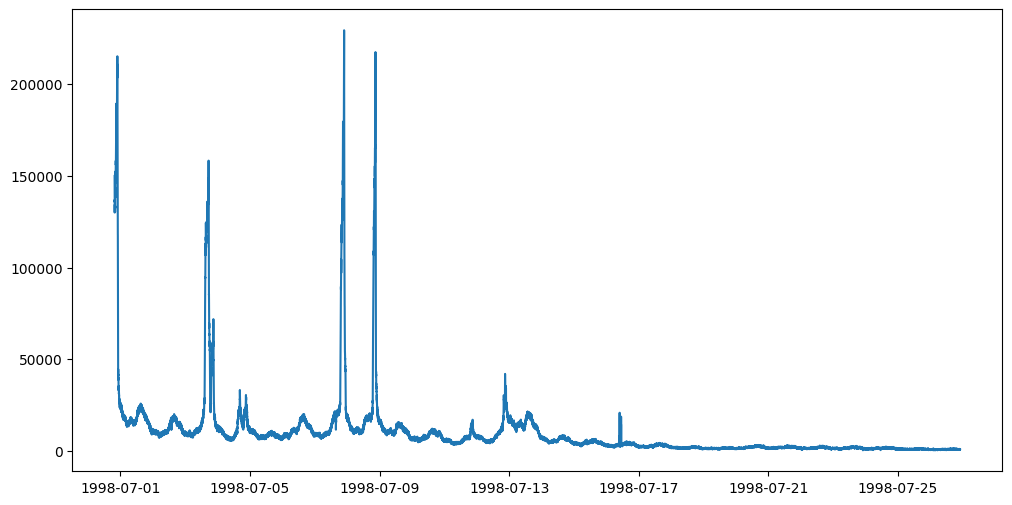

In [74]:
# Extract corresponding timestamps from the test set
timestamps = test['ts'].iloc[sequence_length:].reset_index(drop=True)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(timestamps, y_test_scaled, label="Actual Values")
plt.plot(timestamps, predicted_values, label="Predicted Values")
plt.title("Bi-LSTM Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Requests")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'y_test_scaled' and the predicted values for each model are available:
# rnn_predicted_values, lstm_predicted_values, bilstm_predicted_values

# Calculate absolute errors for each model
rnn_absolute_error = np.abs(y_test_scaled - rnn_predicted_values)
lstm_absolute_error = np.abs(y_test_scaled - lstm_predicted_values)
bilstm_absolute_error = np.abs(y_test_scaled - bilstm_predicted_values)

# Extract timestamps for the first 100 data points (or fewer if less than 100)
timestamps = test['ts'].iloc[sequence_length:].reset_index(drop=True)[:100]
rnn_absolute_error = rnn_absolute_error[:100]
lstm_absolute_error = lstm_absolute_error[:100]
bilstm_absolute_error = bilstm_absolute_error[:100]

# Plot the absolute error for all models
plt.figure(figsize=(12, 6))

# Plot for RNN
plt.plot(timestamps, rnn_absolute_error, label="RNN Absolute Error", color='red')

# Plot for LSTM
plt.plot(timestamps, lstm_absolute_error, label="LSTM Absolute Error", color='blue')

# Plot for Bi-LSTM
plt.plot(timestamps, bilstm_absolute_error, label="Bi-LSTM Absolute Error", color='green')

plt.title("Comparison of Absolute Error for the first 100 minutes for all Models")
plt.xlabel("Datetime")
plt.ylabel("Absolute Error")
plt.xticks(rotation=45)  # Rotate for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
# Extract timestamps for the first 100 minutes (or all if less)
timestamps = test['ts'].iloc[sequence_length:].reset_index(drop=True)[:150]

# Plot the absolute error
plt.figure(figsize=(12, 6))
plt.plot(timestamps, predicted_values[:150], label="predicted_values", marker='o', color='green')
plt.plot(timestamps, y_test_scaled[:150], label="y_test_scaled", marker='x', color='red')

plt.title("Comparison of y_test_scaled and predicted_values")
plt.xlabel("Datetime")
plt.ylabel("Requests")
plt.xticks(rotation=45)  # Rotate for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [77]:
import pandas as pd
import math

workload_pod = 300
pods_min = 1
RRS = 0.6
pods_t = pods_min
pods_count = []

# Scaling logic
for workload_t1 in df["requests"]:
    pods_t1 = workload_t1 / workload_pod
    
    if pods_t1 > pods_t:
        pods_t = pods_t1
        
    elif pods_t1 < pods_t:
        pods_t1 = max(pods_t1, pods_min)
        pods_surplus = (pods_t - pods_t1) * RRS
        pods_t = max((pods_t - pods_surplus), pods_min)
    
    # Store the number of pods for each time step
    pods_count.append(math.ceil(pods_t))

# Save results to a new dataframe
df['required_pods'] = pods_count

In [ ]:
print(df.head(10))
print(df.tail(10))

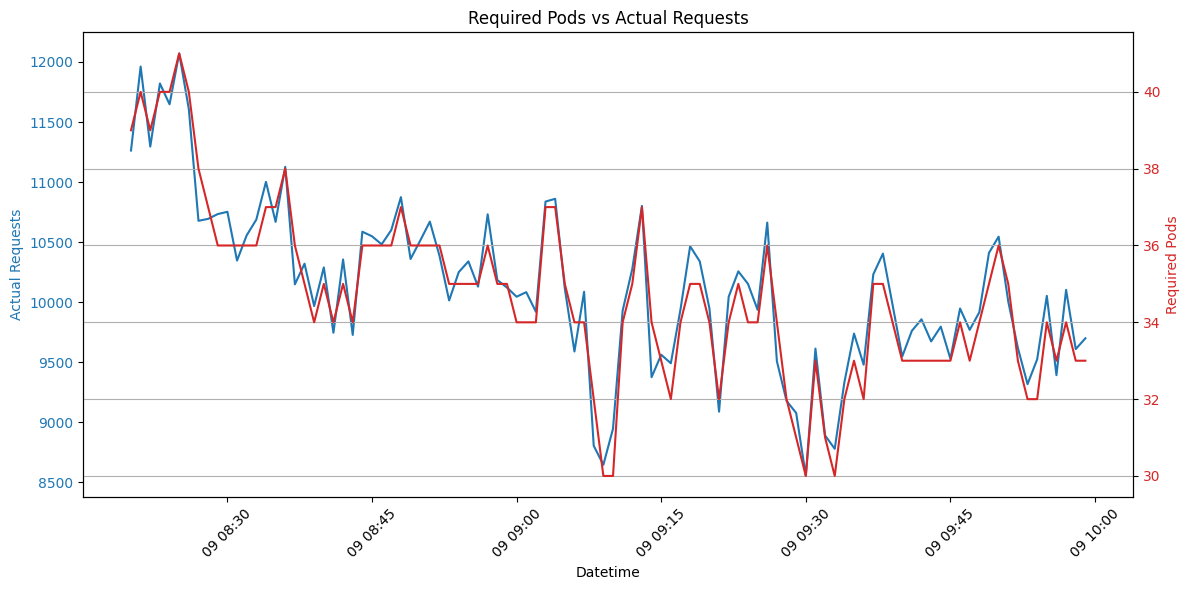

In [78]:
# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the actual requests on the primary y-axis
color1 = 'tab:blue'
ax1.set_xlabel("Datetime")
ax1.set_ylabel("Actual Requests", color=color1)
ax1.plot(df['ts'][100000:100100], df['requests'][100000:100100], color=color1, label="Actual Requests")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel("Required Pods", color=color2)
ax2.plot(df['ts'][100000:100100], df['required_pods'][100000:100100], color=color2, label="Required Pods")
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and grid
plt.title("Required Pods vs Actual Requests")
fig.tight_layout()  # Ensure labels don’t overlap

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
print(df["requests"].max())

In [ ]:
model.save("BiLSTM_autoscaling_ep20.keras")